In [1]:
import numpy as np
import math as mh
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from math import sqrt
from scipy.interpolate import CubicSpline
%matplotlib inline

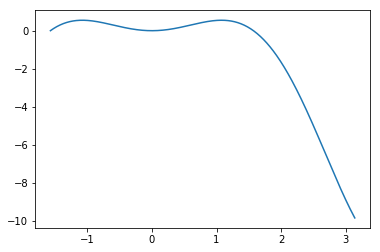

In [3]:
x = np.arange(-np.pi/2,np.pi,0.01)
y = pow(x,2)*np.cos(x)                                                     # функція
plt.plot(x,y)
plt.show()                                                                  

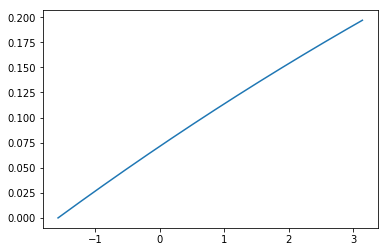

           9             8           7            6             5
3.984e-18 x - 1.561e-17 x + 7.5e-15 x - 1.19e-12 x - 3.829e-10 x
             4            3            2
 + 6.67e-08 x + 4.53e-06 x - 0.001126 x + 0.04356 x + 0.07121


In [4]:
node = np.linspace(-mh.pi/2,mh.pi, num=10)                                    #вузли
f = pow(x,2)*np.cos(x)                                                  #значення функції у вузлах
poly = lagrange(node, f)                                                       #лагранж в пітоні
plt.plot(x,poly(x))                                                            #інтерполяція в пітоні
plt.show()
print(poly)                                                                    #поліном лагранжа

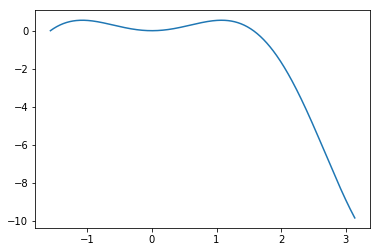

[ 0.00000000e+00  1.65828759e-04  3.13733595e-04  4.44900422e-04
  5.60458115e-04  6.61480594e-04  7.48988852e-04  8.23952926e-04
  8.87293804e-04  9.39885293e-04  9.82555818e-04  1.01609018e-03
  1.04123126e-03  1.05868166e-03  1.06910534e-03  1.07312911e-03
  1.07134423e-03  1.06430777e-03  1.05254413e-03  1.03654634e-03
  1.01677743e-03  9.93671701e-04  9.67635992e-04  9.39050879e-04
  9.08271850e-04  8.75630434e-04  8.41435301e-04  8.05973318e-04
  7.69510575e-04  7.32293372e-04  6.94549178e-04  6.56487550e-04
  6.18301026e-04  5.80165984e-04  5.42243471e-04  5.04679999e-04
  4.67608320e-04  4.31148166e-04  3.95406960e-04  3.60480509e-04
  3.26453662e-04  2.93400946e-04  2.61387182e-04  2.30468064e-04
  2.00690731e-04  1.72094305e-04  1.44710408e-04  1.18563665e-04
  9.36721768e-05  7.00479768e-05  4.76974696e-05  2.66218480e-05
  6.81749212e-06 -1.17236492e-05 -2.90136945e-05 -4.50684827e-05
 -5.99072430e-05 -7.35522794e-05 -8.60286725e-05 -9.73639941e-05
 -1.07588038e-04 -1.16732

In [7]:
def lagrange_func (x ,i , xk ):    
    g,n = 1,len( xk )-1
    for k in range(0, n+1 ):
        if i!=k:
            g*=( x-xk[k])/( xk[i]-xk[k])
    return g

def interpol (x , xk , yk ):
    n=len( xk )-1
    poly_coef = np.array ([ lagrange_func (x ,i , xk ) for i in range ( n+1 )])
    y = np.dot( yk , poly_coef )
    m = np.array([y,poly_coef])
    return m

f = pow(node,2)*np.cos(node)                                                          #функція
massiv = interpol(x,node,f)                                                         #інтерполяція 
plt.plot(x,massiv[0])
plt.show()                                                                          #графік 
print(massiv[0]-y)                                                                  #точність 

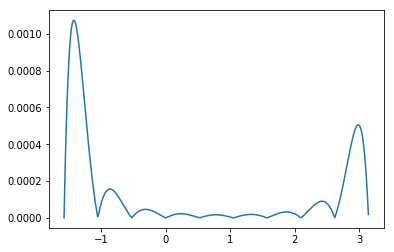

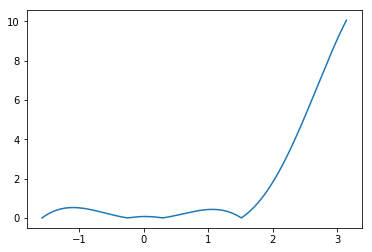

In [8]:
plt.plot(x,abs(massiv[0]-y))                                                      #практична похибка методу лагранжа
plt.show()
plt.plot(x,abs(poly(x)-y))                                                       #практична похибка вбудованиго 
plt.show()

In [9]:
cubic_s = CubicSpline(node,f)                                                              #вбудований CubicSpline
f-cubic_s(node) 

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.77635684e-15])

In [11]:
def cubic_interpolation(x0, x, y):
    x = np.asfarray(x)
    y = np.asfarray(y)
    if np.any(np.diff(x) < 0):
        indexes = np.argsort(x)
        x = x[indexes]
        y = y[indexes]
    size = len(x)
    xdiff = np.diff(x)
    ydiff = np.diff(y)
    Li = np.empty(size)
    Li_1 = np.empty(size-1)
    z = np.empty(size)
    Li[0] = sqrt(2*xdiff[0])
    Li_1[0] = 0.0
    B0 = 0.0
    z[0] = B0 / Li[0]
    for i in range(1, size-1, 1):
        Li_1[i] = xdiff[i-1] / Li[i-1]
        Li[i] = sqrt(2*(xdiff[i-1]+xdiff[i]) - Li_1[i-1] * Li_1[i-1])
        Bi = 6*(ydiff[i]/xdiff[i] - ydiff[i-1]/xdiff[i-1])
        z[i] = (Bi - Li_1[i-1]*z[i-1])/Li[i]
    i = size - 1
    Li_1[i-1] = xdiff[-1] / Li[i-1]
    Li[i] = sqrt(2*xdiff[-1] - Li_1[i-1] * Li_1[i-1])
    Bi = 0.0
    z[i] = (Bi - Li_1[i-1]*z[i-1])/Li[i]
    i = size - 1
    z[i] = z[i] / Li[i]
    for i in range(size-2, -1, -1):
        z[i] = (z[i] - Li_1[i-1]*z[i+1])/Li[i]
    index = x.searchsorted(x0)
    np.clip(index, 1, size-1, index)
    xi1, xi0 = x[index], x[index-1]
    yi1, yi0 = y[index], y[index-1]
    zi1, zi0 = z[index], z[index-1]
    hi1 = xi1 - xi0
    f0 = zi0/(6*hi1)*(xi1-x0)**3 + \
         zi1/(6*hi1)*(x0-xi0)**3 + \
         (yi1/hi1 - zi1*hi1/6)*(x0-xi0) + \
         (yi0/hi1 - zi0*hi1/6)*(xi1-x0)
    return f0

In [12]:
b=cubic_interpolation(x, node, f)                                                               #cubic_spline

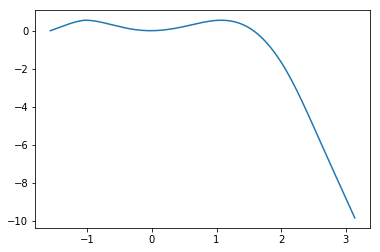

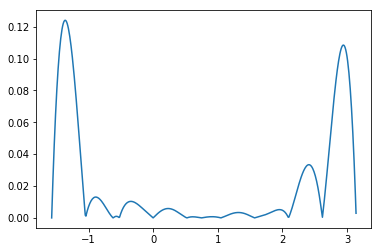

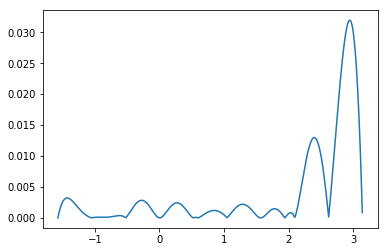

In [13]:
plt.plot(x,b)                                                                                   #графік cubic_spline
plt.show()
plt.plot(x,abs(b-y))                                                                       #похибка методу cubic_interpolation
plt.show()
plt.plot(x,abs(cubic_s(x)-y))                                                             #похибка методу cubic_interpolation  scipy
plt.show()